In [1]:
import torch
import numpy as np 

import sys
import os

os.chdir("..")

import pyarrow as pa
import pandas as pd

import sys
sys.path.insert(0, 'src/')

%load_ext autoreload
%autoreload 2

In [3]:
from model.transformer import (
    MLMtransformer
)

from dataset.tokenizer import (
    SentencePiece
)

from dataset.huggingface.setup import se_oscar
from dataset.dataset import (
    Dataset,
    MLMdataset
)

from torch.utils.tensorboard import SummaryWriter

import torch.nn.functional as F

writer = SummaryWriter()

tokenizer = SentencePiece("m.model")

dataset = MLMdataset(
    tokenizer=tokenizer,
    batch_size = 14,
    max_length = 512,
    debug=False
)

In [3]:
dataset.setup("data/se/train.arrow")

transformer = MLMtransformer(
    vocab_sz=35000,
    hidden_dim=768,
    internal_dim=3072,
    max_seq_len=512,
    dropout=0.1,
    n_encoders=10,
    heads=12,
    optimizer_params={
        "lr": 0.0001,
    },
    activation=F.gelu
)

device = "cuda"
transformer.to(device)

transformer.load("latest.ckp")

load model encoder
load model head


{}

In [28]:
a = np.expand_dims(
    np.concatenate(tokenizer.encode(["hejsan på dig <mask>, avfalllsplatpåse, ehrhekjraf"])),
    axis=0,
)

[autoreload of model.transformer failed: Traceback (most recent call last):
  File "/work/.venv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/work/.venv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 844, in exec_module
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>", line 911, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/work/src/model/transformer.py", line 569
    attention =
               ^


In [98]:
tokenizer.encode(["hejsan på dig <mask>, avfalllsplatpåse, ehrhekjraf"])

[array([31869,     1, 20029,  3101,    58,   296, 31869,     4, 31895,
         8019, 31877,  1250,    17, 15055, 31895,    74,  7505, 31885,
          483, 31894,   845,     2], dtype=int32)]

In [117]:
tokenizer.encode(["hej"])

[array([31869,     1, 20029,     2], dtype=int32)]

[array([31869,     1, 20029,  3101,     2], dtype=int32)]

In [133]:
tokenizer.encode(["hejsan"])

[array([31869,     1,  5311,  3101, 31869,     2], dtype=int32)]

In [116]:
tokenizer.encode(["hejsan"])

[array([31869,     1, 20029,  3101,     2], dtype=int32)]

In [134]:
tokenizer.get_vocab()[31869]

'▁'

In [132]:
tokenizer.get_vocab()[3101]

'san'

In [136]:
tokenizer.decode([5311,  3101])

'hejsan'

In [148]:
tokenizer_map = [tokenizer.decode([x]) for x in range(len(tokenizer))]

In [120]:
s = "Min mamma<mask>"

df, s = transformer.forward_debug(
    s,
    tokenizer=tokenizer,
    topn=10
)

df

6
0.5
<s>Min mamma<mask></s>
.Min mamma <n>
4


,token,proba,mask_pos
31869,,0.140961,4
3,<n>,0.082324,4
866,&,0.012667,4
549,själv,0.008607,4
31896,y,0.007252,4
31938,”,0.006901,4
31895,",",0.006664,4
1846,älskar,0.006648,4
31918,!,0.005743,4
672,19,0.003854,4


{'<unk>': 0,
 '<s>': 1,
 '</s>': 2,
 '<n>': 3,
 '<mask>': 4,
 '<pad>': 5,
 'er': 6,
 'en': 7,
 '▁s': 8,
 'ar': 9,
 'an': 10,
 'in': 11,
 'et': 12,
 '▁d': 13,
 '▁f': 14,
 '▁m': 15,
 '▁o': 16,
 'at': 17,
 'll': 18,
 '▁h': 19,
 '▁v': 20,
 '▁t': 21,
 'är': 22,
 'ör': 23,
 '▁k': 24,
 'ch': 25,
 '▁b': 26,
 '▁p': 27,
 'st': 28,
 'om': 29,
 '▁och': 30,
 'ig': 31,
 'or': 32,
 'att': 33,
 'ag': 34,
 'ed': 35,
 '▁i': 36,
 'on': 37,
 'ing': 38,
 'de': 39,
 '▁att': 40,
 '▁a': 41,
 '▁l': 42,
 '▁för': 43,
 '▁g': 44,
 'ka': 45,
 '▁n': 46,
 '▁en': 47,
 'tt': 48,
 'ill': 49,
 'än': 50,
 'ra': 51,
 'na': 52,
 '▁in': 53,
 'el': 54,
 '▁u': 55,
 '▁är': 56,
 'ck': 57,
 '▁på': 58,
 '▁som': 59,
 'is': 60,
 'kt': 61,
 '▁det': 62,
 're': 63,
 '▁med': 64,
 '▁j': 65,
 '▁S': 66,
 'te': 67,
 'al': 68,
 '▁till': 69,
 '▁av': 70,
 'pp': 71,
 '▁D': 72,
 'ss': 73,
 '▁e': 74,
 'il': 75,
 'år': 76,
 'am': 77,
 '▁st': 78,
 'id': 79,
 'ning': 80,
 'ter': 81,
 'der': 82,
 'it': 83,
 'ån': 84,
 'lig': 85,
 'un': 86,
 'ro': 87,

In [57]:
s = "Min mamma <mask>"

df, s = transformer.forward_debug(
    s,
    tokenizer=tokenizer,
    topn=10
)

df

8
0.625
<s> Min mamma <mask> </s>
<n> Min mamma <n> ,
5


,token,proba,mask_pos
3,<n>,0.885925,5
31869,,0.006353,5
866,&,0.006223,5
31895,",",0.004835,5
31896,y,0.004343,5
35,ed,0.002926,5
460,",",0.002523,5
6,er,0.001220,5
2028,mamma,0.001144,5
31938,”,0.001010,5


In [47]:
s_org = "Uppsatsens disposition är enligt; först kommer mina frågeställningar att identifieras samt anledningar till valet av “Rösträtt för kvinnor” som representant för LKPR:s media strategi för att nå ut till allmänheten."

s_end = "Min analys och slutsatser kommer i ett avslutande stycke att analyseras och diskuteras."

for i in range(10):
    
    s = s_org + " ".join(["<mask>" for ii in range(i)]) + " " + s_end

    df, s = transformer.forward_debug(
        s,
        tokenizer=tokenizer,
        topn=1
    )

    # df.head(20)

64
0.9375
<s> Uppsatsens disposition är enligt; först kommer mina frågeställningar att identifieras samt anledningar till valet av “Rösträtt för kvinnor” som representant för LKPR:s media strategi för att nå ut till allmänheten.<mask> Min analys och slutsatser kommer i ett avslutande stycke att analyseras och diskuteras. </s>
.<n> Uppsatsens disposition är enligt; först kommer mina frågeställningar att identifieras samt anledningar till valet av “Rösträtt för kvinnor” som representant för LKPR:s media strategi för att nå ut till allmänheten.  Min analys och slutsatser kommer i ett avslutande stycke att analyseras och diskuteras. <n>
47
66
0.9393939393939394
<s> Uppsatsens disposition är enligt; först kommer mina frågeställningar att identifieras samt anledningar till valet av “Rösträtt för kvinnor” som representant för LKPR:s media strategi för att nå ut till allmänheten.<mask> <mask> Min analys och slutsatser kommer i ett avslutande stycke att analyseras och diskuteras. </s>
<n> Uppsa

In [42]:
print(s)

<n> . . <n> Uppsatsens disposition är enligt; först kommer mina fråg . identifieras samt anledningar till valet av “Röstr.. kvinnor” som representant för LKPR:s media  för att nå ut till allmänheten  Därefter kommer en överg.. berättelse över hur .. samt hur den utvecklades under året i  att delges .. att underlätta för att förstå det historiska kontextet  Därefter kommer.... . presenteras som senare kommer användas i det efterföljande. där källor analyseras.... fråg   Min analys  Resultatet. i. ... [...]  [...]  [...]. [...]. [...]. [...]  [...]  [...]  [...]  [...] . . . <n> . <n> <n> <n>


In [157]:
softmax = torch.nn.Softmax(dim=0)
proba = softmax(probs[0, mask_pos, 0:len(tokenizer)]).cpu().numpy()

In [164]:
import pandas as pd
df = pd.DataFrame()

df["token"] = tokenizer_map
df["proba"] = proba

In [167]:
df.sort_values("proba", ascending=False).head(20)

,token,proba
3,<n>,0.981569
538,ets,0.002029
13064,ätten,0.000795
56,är,0.000678
57,ck,0.000507
4936,ängen,0.000488
31999,®,0.000382
222,ats,0.000270
5722,änns,0.000248
11853,etsar,0.000229


In [ ]:
np.

In [146]:
tokenizer.decode([2])

'</s>'

In [137]:
s = "Uppsatsens disposition <mask> upplagt enligt följande; först kommer viktiga frågeställningar att identifieras samt anledningar till valet av “Rösträtt för kvinnor” som representant för LKPR:s media strategi för att nå ut till allmänheten. Därefter kommer en övergripligt historisk berättelse över hur rösträtten uppstod samt hur den  utvecklades genom året i Sverige att delges.  Detta för att underlätta för läsaren att förstå det historiska kontextet. Därefter kommer tidigare forskningsstudier kring ämnet att presenteras som senare kommer användas i det efterföljande delen där källor analyseras för att besvara mina frågeställningar. Min analys och slutsatser kommer i ett avslutande stycke jämföras med konklusioner från de tidigare forskningsstudier. "

probs = transformer.forward_debug(
    s,
    tokenizer=tokenizer,
)


In [4]:
import numpy as np
a = np.array([True, False])

b = np.array([False, True])

In [6]:
a | b

array([ True,  True])

In [47]:
list(max_token)

[31869, 31892, 5311, 3101, 58, 31892, 31892, 460]

In [5]:
transformer._models.keys()

dict_keys(['encoder', 'head'])

In [10]:
dataset._iter

In [3]:
i = 1.524 * 10 ** 6

for n in range(1000):
    
    L = []
    
    for d in dataset:

        metrics = transformer.optimize(
            tokens=torch.IntTensor(d.tokens).to(device),
            attention=torch.IntTensor(d.attention).to(device),
            labels=torch.LongTensor(d.labels).to(device),
            label_masks=torch.LongTensor(d.label_mask).to(device),
            grad_norm_clipping = {
                "encoder": 3.5,
                "head": 1
            }
        )
        
        for k in metrics.keys():
            writer.add_scalar(f'{k}/train', metrics[k], i)

        i +=1
        
        if i % 1000 ==0: 
            transformer.checkpoint("latest.ckp")
            
        if i % 100000 ==0: 
            transformer.checkpoint(f"{i}.ckp")

KeyboardInterrupt: 

In [83]:
transformer.load("test.ckp")

{}

In [31]:
torch.empty(3, dtype=torch.long).random_(5)

tensor([4, 2, 4])

In [13]:
transformer.checkpoint("test.ckp")

'test.ckp'

In [28]:
i = 0
for d in dataset:
    
    i +=1
    
    if i > 10:
        break

In [48]:
torch.LongTensor(d.tokens).shape

torch.Size([100, 512])

In [15]:
y = transformer(
    tokens=torch.IntTensor(d.tokens).to(device),
    attention=torch.IntTensor(d.attention).to(device),
)

In [16]:
y.shape

torch.Size([5, 512, 35000])

In [3]:
se_oscar()

Reusing dataset oscar (data/oscar/unshuffled_deduplicated_sv/1.0.0/84838bd49d2295f62008383b05620571535451d84545037bb94d6f3501651df2)


  0%|          | 0/1 [00:00<?, ?it/s]

train
0.0 % done
0.01 % done
0.02 % done
0.03 % done
0.04 % done
0.05 % done
0.06 % done
0.07 % done
0.08 % done
0.09 % done
0.1 % done
0.11 % done
0.12 % done
0.13 % done
0.14 % done
0.15 % done
0.16 % done
0.17 % done
0.18 % done
0.19 % done
0.2 % done
0.21 % done
0.22 % done
0.23 % done
0.24 % done
0.25 % done
0.26 % done
0.27 % done
0.28 % done
0.29 % done
0.3 % done
0.31 % done
0.32 % done
0.33 % done
0.34 % done
0.35 % done
0.36 % done
0.37 % done
0.38 % done
0.39 % done
0.4 % done
0.41 % done
0.42 % done
0.43 % done
0.44 % done
0.45 % done
0.46 % done
0.47 % done
0.48 % done
0.49 % done
0.5 % done
0.51 % done
0.52 % done
0.53 % done
0.54 % done
0.55 % done
0.56 % done
0.57 % done
0.58 % done
0.59 % done
0.6 % done
0.61 % done
0.62 % done
0.63 % done
0.64 % done
0.65 % done
0.66 % done
0.67 % done
0.68 % done
0.69 % done
0.7 % done
0.71 % done
0.72 % done
0.73 % done
0.74 % done
0.75 % done
0.76 % done
0.77 % done
0.78 % done
0.79 % done
0.8 % done
0.81 % done
0.82 % done
0.83 % 

'tmp/se_oscar.txt'

In [3]:
from dataset.text import TextFileIterator

text_file_iterator = TextFileIterator("tmp/se_oscar.txt", 1000)

In [27]:
from dataset.tokenizer import (
    SentencePiece
)

from dataset.huggingface.setup import se_oscar
from dataset.dataset import (
    Dataset,
    MLMdataset
)

tokenizer = SentencePiece("m.model")

dataset = MLMdataset(
    tokenizer=tokenizer,
    batch_size = 10,
    max_length = 512,
    debug=False
)

dataset.setup("data/se/val.arrow")

In [ ]:
dataset.text_file_to_arrow(
    iterator=text_file_iterator,
    file_path="test_oscar.arrow"
)

In [6]:
import random
indicies = list(range(len(dataset)))
random.shuffle(indicies)

In [7]:
val_indicies = indicies[0:200000]
train_indicies = indicies[200000:]

In [8]:
import time
s = time.time()
dataset.split("data/se/val.arrow", val_indicies, chunk_size=1000)
time.time() - s

102.15057897567749

In [9]:
import time
s = time.time()
dataset.split("data/se/train.arrow", train_indicies, chunk_size=1000)
time.time() - s

3944.9629979133606

In [10]:
for d in dataset: 
    break

In [14]:
for batch in dataset._data.to_batches():
    print(batch.to_pandas().shape)
    break

(1000, 1)


In [7]:
batches = [recordbatch for recordbatch in dataset._data.to_batches()]

offsets = np.cumsum([0] + [len(b) for b in batches], dtype=np.int64)

16000

In [ ]:
pa.Table.from_batches(
            [
                self._batches[batch_idx].slice(i - self._offsets[batch_idx], 1)
                for batch_idx, i in zip(batch_indices, indices)
            ],
            schema=self._schema,
        )


In [93]:
batches[[0, 2, 4, 5]]

TypeError: list indices must be integers or slices, not list

In [149]:
search(1982, 1990, offsets)

((1, 982), (1, 990))

In [83]:
%timeit search(1982, 51982, offsets)

16.3 µs ± 47.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [154]:
dataset._slice(offset=0, length=1000)["token_ids"].shape

(1000,)

In [46]:
offsets[15:]

array([   15000,    16000,    17000, ..., 11013000, 11014000, 11014487])

In [22]:
dataset._offsets

array([       0,     1000,     2000, ..., 11013000, 11014000, 11014487])

In [12]:
indices = val_indicies
batch_indices = np.searchsorted(offsets, indices, side="right") - 1

In [95]:
len(batch_indices)

200000

In [14]:
schema = dataset._data.schema

dd = pa.Table.from_batches(
    [
        batches[batch_idx].slice(i - offsets[batch_idx], 1)
        for batch_idx, i in zip(batch_indices, indices)
    ],
    # schema=schema,
)

In [16]:
dd

pyarrow.Table
token_ids: list<item: int32>
  child 0, item: int32

In [ ]:
dd.to_pandas()

In [ ]:
self._batches

In [117]:
table

pyarrow.Table
a: int64

In [6]:
table = pa.table({'a': range(5)})
table.take([1, 2]).to_pandas()

,a
0,1
1,2


In [7]:


pa.Table.from_batches(
    [
        self._batches[batch_idx].slice(i - self._offsets[batch_idx], 1)
        for batch_idx, i in zip(batch_indices, indices)
    ],
    schema=self._schema,
)

,a
0,0
1,1
2,2
3,3
4,4


In [3]:
dataset._data

NameError: name 'dataset' is not defined

In [9]:
dataset._data[0:20].to_pandas()

TypeError: Index must either be string or integer

In [7]:
dataset._data["token_ids"][0]

<pyarrow.ListScalar: [31869, 1, 4958, 3107, 30450, 1647, 99, 40, 19699, 12013, 667, 3207, 30, 16126, 2793, 2014, 7362, 24674, 555, 64, 2372, 851, 120, 601, 2806, 6961, 9695, 16693, 90, 12678, 222, 31892, 20522, 513, 6360, 90, 43, 11290, 40, 8758, 5645, 239, 2627, 31892, 31869, 3, 4958, 11260, 36, 3264, 1173, 11164, 104, 1641, 3339, 40, 237, 31892, 31870, 31892, 904, 7828, 24674, 555, 1054, 16863, 604, 40, 5823, 24674, 555, 601, 9262, 2806, 6961, 9695, 16693, 413, 40, 19699, 12013, 99, 24674, 555, 64, 2372, 851, 120, 667, 24674, 555, 12924, 30, 16126, 2793, 2014, 7362, 852, 3282, 31892, 24411, 90, 12678, 222, 30, 166, 31231, 70, 20522, 513, 6360, 36, 839, 31892, 31869, 3, 3414, 4275, 1187, 2033, 974, 106, 104, 2187, 1878, 31892, 5981, 104, 1068, 438, 2815, 9494, 794, 18316, 12678, 17, 7772, 31892, 20522, 513, 6360, 166, 288, 10086, 31870, 5645, 30, 11290, 7, 56, 40, 8758, 5645, 239, 2627, 31892, 31869, 3, 20522, 513, 6360, 225, 40, 11959, 5645, 443, 105, 10410, 6442, 18652, 31892, 171, 

In [8]:
dataset._data["token_ids"].slice(1, 1)

[
  [
    [
      31869,
      1,
      1400,
      89,
      62,
      1533,
      1745,
      58,
      27363,
      285,
      ...
      1655,
      166,
      23504,
      69,
      576,
      31869,
      0,
      3,
      31869,
      2
    ]
  ]
]

In [2]:
from datasets import load_dataset

In [ ]:
datasets = load_dataset('imdb', cache_dir="data/")

In [7]:
from datasets import get_dataset_config_names

configs = get_dataset_config_names("wikipedia")

In [3]:
# dataset = load_dataset('wikipedia', '20200501.sv', cache_dir="data/", beam_runner='DirectRunner')

In [34]:
from datasets import load_dataset
dataset = load_dataset('oscar', 'unshuffled_deduplicated_sv', cache_dir="data/")


Reusing dataset oscar (data/oscar/unshuffled_deduplicated_sv/1.0.0/84838bd49d2295f62008383b05620571535451d84545037bb94d6f3501651df2)


  0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
from dataset.tokenizer import TextFileIterator

In [49]:
text_file_iterator = TextFileIterator("tmp/small.txt", 100)


In [2]:
from typing import (
    Any,
    List,
    Dict
)

import logging

from dataset.tokenizer import Tokenizer

import pyarrow as pa

from numba import jit
import random

from dataclasses import dataclass

from dataset.dataset import (
    Dataset,
    MLMdataset
)

In [2]:
class TrainingResources(object):
    
    OPTIMIZER_NAME = "optimizer"
    MODEL_NAME = "model"
    
    def __init__(self, optimizer: Any, model: Any):
        
        self._optimizer = optimizer 
        self._model = model
        
    def checkpoint(self, name: str):
        
        pass
        
        
        

ImportError: cannot import name 'MLMdataset' from 'dataset.dataset' (/work/src/dataset/dataset.py)

In [3]:
from model.transformer import (
    PositionalEncoding,
    Embedder,
    MultiHeadAttention,
    attention,
    Encoder,
)

ModuleNotFoundError: No module named 'model'

In [3]:
encoder = Encoder(
    vocab_sz=35000,
    hidden_dim=768,
    internal_dim=768,
    dropout=0.1,
    n_encoders=12,
    heads=12,
)

In [20]:
x.repeat(4, 2, 1)

tensor([[[26211,  4182, 20080,  ...,  9312, 27593, 31647],
         [15351, 20508, 23099,  ..., 34393, 27169,  9306],
         [30976,  9700, 11465,  ..., 19217, 17591, 25990],
         ...,
         [13834, 10469, 32516,  ..., 27889, 18994, 31007],
         [23755, 20204, 15316,  ..., 13635, 13544, 21151],
         [15956, 20063, 21463,  ..., 17455, 23388, 16539]],

        [[26211,  4182, 20080,  ...,  9312, 27593, 31647],
         [15351, 20508, 23099,  ..., 34393, 27169,  9306],
         [30976,  9700, 11465,  ..., 19217, 17591, 25990],
         ...,
         [13834, 10469, 32516,  ..., 27889, 18994, 31007],
         [23755, 20204, 15316,  ..., 13635, 13544, 21151],
         [15956, 20063, 21463,  ..., 17455, 23388, 16539]],

        [[26211,  4182, 20080,  ...,  9312, 27593, 31647],
         [15351, 20508, 23099,  ..., 34393, 27169,  9306],
         [30976,  9700, 11465,  ..., 19217, 17591, 25990],
         ...,
         [13834, 10469, 32516,  ..., 27889, 18994, 31007],
         [

In [4]:
encoder.to("cuda")

Encoder(
  (_embedder): Embedder(
    (_model): Embedding(35000, 768)
  )
  (_pos_enc): PositionalEncoding(
    (_dropout): Dropout(p=0.1, inplace=False)
  )
  (_encoder_layers): ModuleList(
    (0): EncoderLayer(
      (_layernorm1): LayerNorm()
      (_layernorm2): LayerNorm()
      (_attention): MultiHeadAttention(
        (_dropout): Dropout(p=0.1, inplace=False)
        (_q_layer): Linear(in_features=768, out_features=768, bias=True)
        (_k_layer): Linear(in_features=768, out_features=768, bias=True)
        (_v_layer): Linear(in_features=768, out_features=768, bias=True)
        (_output_layer): Linear(in_features=768, out_features=768, bias=True)
      )
      (_fully_connected): FullyConnected(
        (_layer1): Linear(in_features=768, out_features=768, bias=True)
        (_dropout): Dropout(p=0.1, inplace=False)
        (_layer2): Linear(in_features=768, out_features=768, bias=True)
      )
      (_dropout1): Dropout(p=0.1, inplace=False)
      (_dropout2): Dropout(p=0.1

In [6]:
x = torch.randint(low=0, high=35000, size=(10, 512)).to("cuda")
encoder(x)

torch.Size([10, 512, 768])
torch.Size([10, 512, 768])
torch.Size([10, 512, 768])
encoder input torch.Size([10, 512, 768])
q torch.Size([10, 512, 12, 64])
k torch.Size([10, 512, 12, 64])
v torch.Size([10, 512, 12, 64])
q torch.Size([10, 12, 512, 64])
k torch.Size([10, 12, 512, 64])
v torch.Size([10, 12, 512, 64])
scores torch.Size([10, 12, 512, 64])
y torch.Size([10, 512, 768])
attention out torch.Size([10, 512, 768])
q torch.Size([10, 512, 12, 64])
k torch.Size([10, 512, 12, 64])
v torch.Size([10, 512, 12, 64])
q torch.Size([10, 12, 512, 64])
k torch.Size([10, 12, 512, 64])
v torch.Size([10, 12, 512, 64])
scores torch.Size([10, 12, 512, 64])
y torch.Size([10, 512, 768])
torch.Size([10, 512, 768])
encoder input torch.Size([10, 512, 768])
q torch.Size([10, 512, 12, 64])
k torch.Size([10, 512, 12, 64])
v torch.Size([10, 512, 12, 64])
q torch.Size([10, 12, 512, 64])
k torch.Size([10, 12, 512, 64])
v torch.Size([10, 12, 512, 64])
scores torch.Size([10, 12, 512, 64])
y torch.Size([10, 512, 7

RuntimeError: CUDA out of memory. Tried to allocate 120.00 MiB (GPU 0; 10.91 GiB total capacity; 9.60 GiB already allocated; 108.00 MiB free; 9.86 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

torch.Size([10, 512, 1024])
torch.Size([10, 512, 1024])
torch.Size([10, 512, 1024])
encoder input torch.Size([10, 512, 1024])
q torch.Size([10, 512, 4, 256])
k torch.Size([10, 512, 4, 256])
v torch.Size([10, 512, 4, 256])
q torch.Size([10, 4, 512, 256])
k torch.Size([10, 4, 512, 256])
v torch.Size([10, 4, 512, 256])
scores torch.Size([10, 4, 512, 256])
y torch.Size([10, 512, 1024])
attention out torch.Size([10, 512, 1024])
q torch.Size([10, 512, 4, 256])
k torch.Size([10, 512, 4, 256])
v torch.Size([10, 512, 4, 256])
q torch.Size([10, 4, 512, 256])
k torch.Size([10, 4, 512, 256])
v torch.Size([10, 4, 512, 256])
scores torch.Size([10, 4, 512, 256])
y torch.Size([10, 512, 1024])
torch.Size([10, 512, 1024])
encoder input torch.Size([10, 512, 1024])
q torch.Size([10, 512, 4, 256])
k torch.Size([10, 512, 4, 256])
v torch.Size([10, 512, 4, 256])
q torch.Size([10, 4, 512, 256])
k torch.Size([10, 4, 512, 256])
v torch.Size([10, 4, 512, 256])
scores torch.Size([10, 4, 512, 256])
y torch.Size([1

tensor([[[-2.0863e-01, -2.4125e-01, -6.2527e-01,  ...,  1.5047e+00,
          -5.3904e-01, -8.2341e-01],
         [-2.4984e-01,  7.6841e-01, -2.7213e-01,  ...,  5.6179e-01,
           3.7790e-01,  3.9456e-01],
         [ 1.2623e+00, -6.3085e-01,  1.6915e+00,  ...,  1.8171e+00,
          -1.1863e+00,  1.1677e-01],
         ...,
         [ 6.1879e-01,  2.4557e+00, -1.3869e+00,  ...,  5.4948e-03,
          -2.0764e-01, -1.4375e+00],
         [ 2.2359e+00,  6.3035e-01, -8.1860e-01,  ...,  1.1837e+00,
           4.3075e-01, -6.6730e-01],
         [ 1.5556e+00, -1.1436e-01, -1.9898e-01,  ...,  8.2057e-01,
           1.1176e+00,  1.7700e+00]],

        [[-2.6132e-01,  6.3917e-01, -1.4913e+00,  ...,  8.7155e-01,
          -1.0358e-01, -1.1606e+00],
         [ 1.2986e+00, -8.6964e-01,  1.0736e+00,  ..., -9.4724e-01,
          -6.5281e-01, -4.9655e-02],
         [-3.0564e-01, -1.6819e+00,  1.5789e+00,  ..., -8.4748e-01,
           1.1127e+00,  3.5667e-01],
         ...,
         [ 2.3584e-01,  1

In [40]:
encoder.to("cuda")

Encoder(
  (_embedder): Embedder(
    (_model): Embedding(35000, 1024)
  )
  (_pos_enc): PositionalEncoding(
    (_dropout): Dropout(p=0.1, inplace=False)
  )
  (_encoder_layers): ModuleList(
    (0): EncoderLayer(
      (_layernorm1): LayerNorm()
      (_layernorm2): LayerNorm()
      (_attention): MultiHeadAttention(
        (_dropout): Dropout(p=0.1, inplace=False)
        (_q_layer): Linear(in_features=1024, out_features=1024, bias=True)
        (_k_layer): Linear(in_features=1024, out_features=1024, bias=True)
        (_v_layer): Linear(in_features=1024, out_features=1024, bias=True)
        (_output_layer): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (_fully_connected): FullyConnected(
        (_layer1): Linear(in_features=1024, out_features=2048, bias=True)
        (_dropout): Dropout(p=0.1, inplace=False)
        (_layer2): Linear(in_features=2048, out_features=1024, bias=True)
      )
      (_dropout1): Dropout(p=0.1, inplace=False)
      (_dropout2): 

In [5]:
pos_enc = PositionalEncoding(hidden_dim = 1024, max_seq_len=512)

In [7]:
pos_enc.pos_enc.shape


torch.Size([1, 512, 1024])

DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


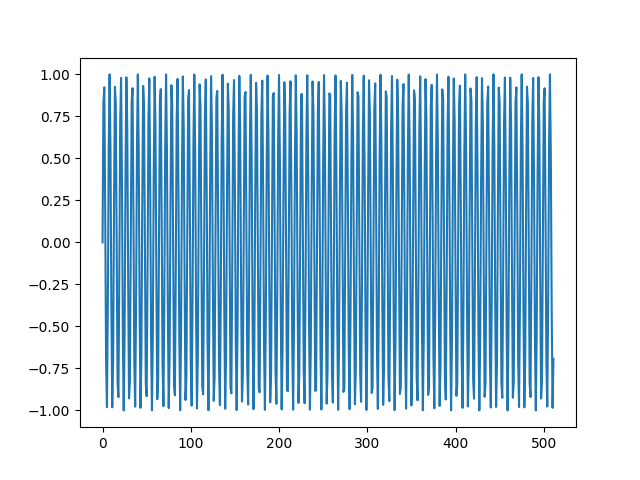

In [103]:
%matplotlib notebook

plt.plot(pos_enc.pe[0, 0:512, 2])

In [3]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.DEBUG)

In [4]:
from dataset.tokenizer import (
    SentencePiece
)

tokenizer = SentencePiece("m.model")
dataset = MLMdataset(tokenizer, batch_size=100, debug=False)

dataset.setup("tmp/test.arrow")

In [6]:
dataset._data.schema


token_ids: list<item: int32>
  child 0, item: int32
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 380

In [47]:
dataset._data[0:3]["token_ids"]

[
  [
    [
      31869,
      1,
      4958,
      3107,
      30450,
      1647,
      99,
      40,
      19699,
      12013,
      ...
      19984,
      251,
      20522,
      513,
      6360,
      36,
      839,
      3,
      31869,
      2
    ],
    [
      31869,
      1,
      1400,
      89,
      62,
      1533,
      1745,
      58,
      27363,
      285,
      ...
      1655,
      166,
      23504,
      69,
      576,
      31869,
      0,
      3,
      31869,
      2
    ],
    [
      31869,
      1,
      17481,
      7,
      1376,
      2015,
      145,
      160,
      70,
      7651,
      ...
      90,
      21961,
      125,
      36,
      462,
      15653,
      31892,
      3,
      31869,
      2
    ]
  ]
]

In [46]:
dataset._data[0:1]["token_ids"]

[
  [
    [
      31869,
      1,
      4958,
      3107,
      30450,
      1647,
      99,
      40,
      19699,
      12013,
      ...
      19984,
      251,
      20522,
      513,
      6360,
      36,
      839,
      3,
      31869,
      2
    ]
  ]
]

In [52]:
dataset._data[2:3].to_pandas()

,token_ids
0,"[31869, 1, 17481, 7, 1376, 2015, 145, 160, 70,..."


In [48]:
dataset._data.schema

token_ids: list<item: int32>
  child 0, item: int32
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 380

In [64]:
indicides = list(range(10000))

In [77]:
np.array_split(np.array(list(range(10000))), 7)[1]

array([1429, 1430, 1431, ..., 2855, 2856, 2857])

In [65]:
import time

s = time.time()

dataset.split("test.arrow", indicides, chunk_size=1000)

time.time() - s

INFO:root:Process entry 0


9.667891025543213

In [86]:
import time

s = time.time()

dataset.split("test.arrow", indicides, chunk_size=100)

time.time() - s

INFO:root:Process entry 0


3.2769010066986084

In [87]:
dataset2 = MLMdataset(tokenizer, batch_size=100, debug=False)
dataset2.setup("test.arrow")

In [88]:
dataset2._data.to_pandas()

,token_ids
0,"[31869, 1, 4958, 3107, 30450, 1647, 99, 40, 19..."
1,"[31869, 1, 1400, 89, 62, 1533, 1745, 58, 27363..."
2,"[31869, 1, 17481, 7, 1376, 2015, 145, 160, 70,..."
3,"[31869, 1, 27962, 9391, 56, 62, 2506, 4892, 30..."
4,"[31869, 1, 29880, 26361, 2538, 31923, 393, 926..."
...,...
9995,"[31869, 1, 4365, 53, 5491, 4257, 31935, 7409, ..."
9996,"[31869, 1, 254, 1249, 11413, 31875, 21161, 368..."
9997,"[31869, 1, 9709, 140, 4300, 1689, 15985, 59, 6..."
9998,"[31869, 1, 20260, 1869, 67, 129, 31892, 4665, ..."


In [39]:
indices = pa.array([0, 0, 0])

pa.compute.take(dataset._data["token_ids"], [0], boundscheck=False)

#dataset._data.take([0])

ArrowInvalid: offset overflow while concatenating arrays

In [5]:
dd = dataset._slice(0, 1020)

In [589]:
t = time.time()
dataset._trim_select_pad(arrays=(list(dd["token_ids"])), max_length=512, pad_id=2)
time.time() - t 

0.012624502182006836

In [494]:
1020 * 512 * 0.15

78336.0

In [490]:
_, l =  dataset.mask(
    dd[dataset.TOKEN_IDS_COLUMN]
)

In [493]:
l.sum()

40431

In [32]:
tokenizer.unk_token

(' ⁇ ', 0)

In [53]:
tokenizer._tokenizer.decode([3])

'<n>'

In [144]:
tokenizer("<n>")

[array([31869,     3], dtype=int32)]

In [516]:
d["token_ids"].shape

(100,)

('<pad>', 5)

In [1]:
dataset._data

NameError: name 'dataset' is not defined

In [52]:
unique, counts = np.unique(d.labels[d.label_mask], return_counts=True)

np.asarray((unique, counts)).T

array([[    3,    44],
       [    6,     1],
       [    7,     4],
       ...,
       [31991,     2],
       [31997,     1],
       [31998,     1]])

In [156]:
import time

s = time.time()

b = 1000

i = 0

for d in dataset:
    
    i+=1
    
    if i >=100000000000:
        break
    
e = time.time()

e - s

196.954017162323

3.183333333333333

In [10]:
from dataset.tokenizer import TextFileIterator

In [11]:
text_file_iterator = TextFileIterator("tmp/se_oscar.txt", 1000)